In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import json
import matplotlib.pyplot as plt
from geenuff.base import types
from dna_features_viewer import GraphicFeature, GraphicRecord

In [150]:
from wip.wipClasses import Transcript,SuperLocus,CoordinatePiece,Feature, GeenuffCollection, DrawableSuperLocus, DrawableGeenuffCollection

In [151]:
# load example
example_json = "example_data.json"
example_data = None
with open(example_json) as json_file:
    example_data = json.load(json_file)

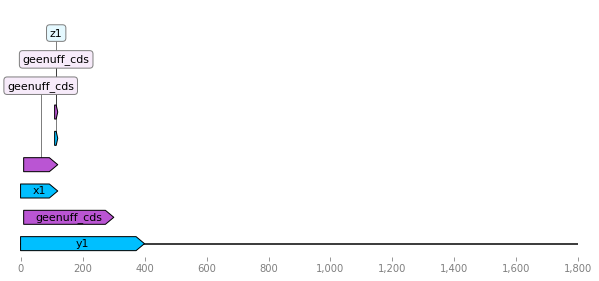

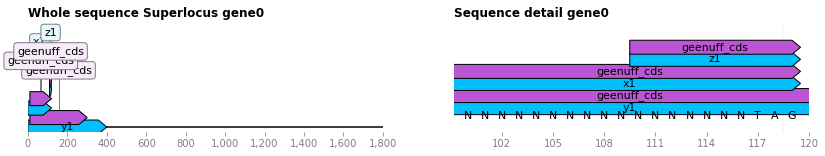

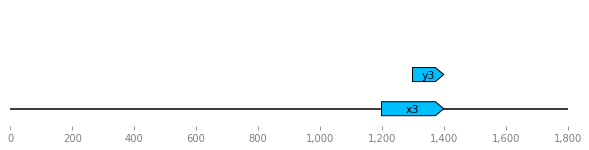

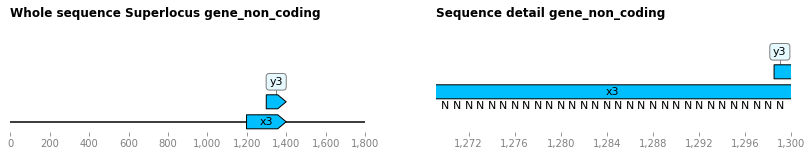

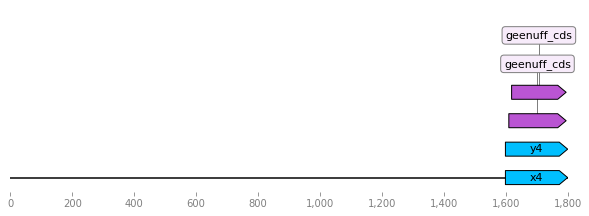

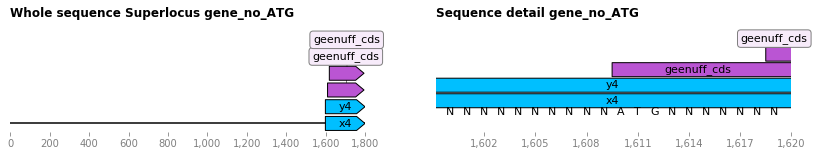

In [158]:
gc = GeenuffCollection.from_dct(example_data[0])
zoomies = [(100,120),(1270,1300), (1600,1620)]
collection = []
for j,i in enumerate(gc.super_loci):
    #print ([item.features for item in i.transcripts])
    tmp = DrawableSuperLocus(super_locus=i,coordinate_piece=gc.coordinate_piece)
    collection.append(tmp)
    tmp.draw()
    tmp.draw(zoom_coordinates = zoomies[j])
#print (gc.coordinate_piece.sequence)


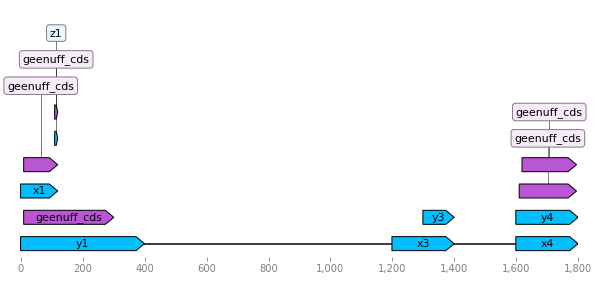

In [164]:
DrawableGeenuffCollection(list_of_drawable_super_loci=collection,coordinate_piece = gc.coordinate_piece).draw()


# todo
class DrawableSuperLocus(SuperLocus):
    
    def __init__(self, is_fully_contained=None, transcripts=None, type=None, id=None, overlaps=None, given_name=None):
        super().__init__(self, is_fully_contained=None, transcripts=None, type=None, id=None, overlaps=None, given_name=None )
        self.graphic_features = []
        try:
            for t in self.transcripts:
                for feature in t.features:
                    if feature.type in ['geenuff_intron']:
                        pass
                    elif feature.type in ['geenuff_transcript']:
                        self.graphic_features.append(
                            GraphicFeature(
                                start=feature.start, 
                                end=feature.end, 
                                strand=convert_strand_info(feature.is_plus_strand),
                                color=color(feature.type),label=feature.given_name), 
                        )
                    else:
                        features.append(
                            GraphicFeature(
                                start=feature.start, 
                                end=feature.end, 
                                strand=convert_strand_info(feature.is_plus_strand),
                                color=color(feature.type),label=feature.type), 
                        )
                self.graphic_record = GraphicRecord(sequence=seq, features=features)
        except Exception as e:
            print(e)
            raise Exception
        
    


# todo
def color(geenuff_feature_name):
    valid = [t.value for t in types.GeenuffFeature]
    if not geenuff_feature_name in valid:
        raise Exception("{} is not a valid GeenuffFeature name".format(geenuff_feature_name))
    colmap = {
       'geenuff_transcript':'#00bfff',
       'geenuff_cds': '#ba55d3',
       'geenuff_intron': '#ffdab9',
       'missing_utr_5p':'#dc143c' ,
       'missing_utr_3p' :'#dc143c',
       'empty_super_locus' :'#dc143c',
       'missing_start_codon' :'#dc143c',
       'missing_stop_codon' :'#dc143c',
       'wrong_starting_phase' :'#dc143c',
       'mismatched_ending_phase' :'#dc143c',
       'overlapping_exons' :'#dc143c',
       'too_short_intron' :'#dc143c'
    }
    return colmap.get(geenuff_feature_name, '#c0c0c0')

def convert_strand_info(geenuff_is_plus_strand): #todo
    #print(geenuff_is_plus_strand)
    if geenuff_is_plus_strand:
        return +1
    else:
        return -1
    

In [19]:
def plot_superloci(data, zoom_coords_dict_by_superloc_id=None, plot_separately=True, output_directory=".",output_prefix="tmp_"):
    for item in data:
        super_loci = item['super_loci']
        coordinate_piece = item['coordinate_piece']
    
        # for vis:
        seq = coordinate_piece['sequence']
        features = []
        for sl in super_loci:
            if plot_separately:
                features = []

            sl_transcripts = sl['transcripts']
            for sl_t in sl_transcripts:
                for feature in sl_t["features"]:
                    #print(feature['is_plus_strand'])
                    if feature['type'] in ['geenuff_intron']:
                        pass
                    elif feature['type'] in ['geenuff_transcript']:
                        features.append(
                            GraphicFeature(
                                start=feature["start"], 
                                end=feature["end"], 
                                strand=convert_strand_info(feature['is_plus_strand']), #todo
                                color=color(feature['type']),label=feature['given_name']), 
                        )
                    else:
                        features.append(
                            GraphicFeature(
                                start=feature["start"], 
                                end=feature["end"], 
                                strand=convert_strand_info(feature['is_plus_strand']), #todo
                                color=color(feature['type']),label=feature['type']), 
                        )
            record = GraphicRecord(sequence=seq, features=features)
            if zoom_coords_dict_by_superloc_id:
                zoom = zoom_coords_dict_by_superloc_id
                zoom_start, zoom_end = zoom[str(sl["id"])]  # coordinates of the "detail"
                cropped_record = record.crop((zoom_start, zoom_end))
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2))
                ax1.set_title("Whole sequence Superlocus "+str(sl["id"]), loc='left', weight='bold')
                record.plot(ax=ax1)

                cropped_record.plot_translation(ax=ax2, location=(400, 400),
                                        fontdict={'weight': 'bold'})
                cropped_record.plot(ax=ax2, plot_sequence=True)
                ax2.set_title("Sequence detail", loc='left', weight='bold')

                fig.savefig(output_prefix+str(sl["id"])+'.png', bbox_inches='tight') 
            else:
                pass



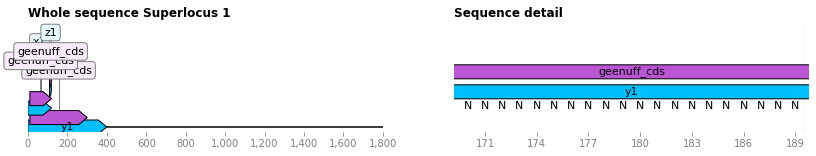

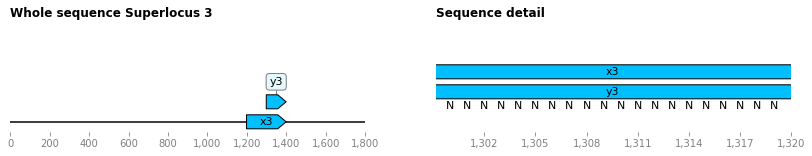

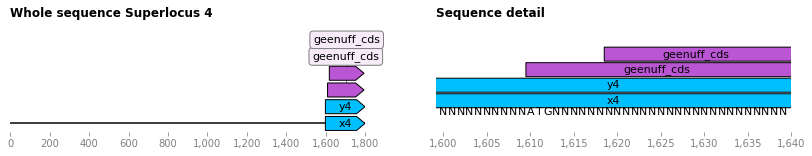

In [21]:
plot_superloci(data=example_data, output_directory=".",zoom_coords_dict_by_superloc_id={
    "1":(170,190), "2":(1300,1320), "3":(1300,1320), "4":(1600,1640)}, plot_separately=True)

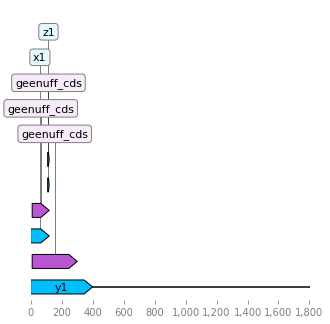

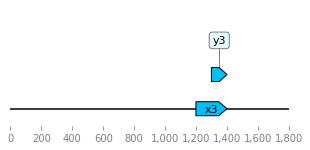

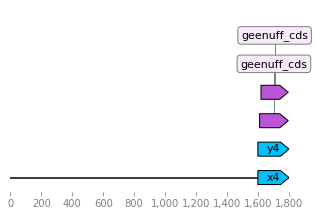

In [125]:
superloci = []
coordinatepieces = []
zoom = {}
zoom["1"] = (170,190)
zoom["3"] = (1300,1320)
zoom["3"] = (1300,1320)
zoom["4"] = (1600,1640)


for item in example_data:
    super_loci = item['super_loci']
    coordinate_piece = item['coordinate_piece']
    
    # for vis:
    seq = coordinate_piece['sequence']
    #for c in coordinate_piece:
    #    coordinatepieces.append(c)
    #print(coordinate_piece)
    for sl in super_loci:
        features = []

        #features = []
        #print(sl,"\n")
        #todo
        #slo  = SuperLocus(is_fully_contained=sl["is_fully_contained"], transcripts=[])
        sl_transcripts = sl['transcripts']
        for sl_t in sl_transcripts:
            for feature in sl_t["features"]:
                #print(feature['is_plus_strand'])
                if feature['type'] in ['geenuff_intron']:
                    pass
                elif feature['type'] in ['geenuff_transcript']:
                    features.append(
                        GraphicFeature(
                            start=feature["start"], 
                            end=feature["end"], 
                            strand=convert_strand_info(feature['is_plus_strand']), #todo
                            color=color(feature['type']),label=feature['given_name']), 
                    )
                else:
                    features.append(
                        GraphicFeature(
                            start=feature["start"], 
                            end=feature["end"], 
                            strand=convert_strand_info(feature['is_plus_strand']), #todo
                            color=color(feature['type']),label=feature['type']), 
                    )
        record = GraphicRecord(sequence=seq, features=features)
       # zoom_start, zoom_end = zoom[str(sl["id"])]  # coordinates of the "detail"
       # cropped_record = record.crop((zoom_start, zoom_end))
      #  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2))
        #ax1.set_title("Whole sequence Superlocus "+str(sl["id"]), loc='left', weight='bold')
       # record.plot(ax=ax1)
       # record = GraphicRecord(sequence_length=1000, features=features)
        record.plot(figure_width=5)


       # cropped_record.plot_translation(ax=ax2, location=(400, 400),
       #                         fontdict={'weight': 'bold'})
       # cropped_record.plot(ax=ax2, plot_sequence=True)
       # ax2.set_title("Sequence detail", loc='left', weight='bold')

       # fig.savefig('example_'+str(sl["id"])+'.png', bbox_inches='tight')        
